## Classification on Diabetes Dataset

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [3]:
data = open("dataset/diabetes.data")

In [4]:
data = data.readlines()

In [6]:
data[:5]

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label\n',
 '6,148,72,35,0,33.6,0.627,50,1\n',
 '1,85,66,29,0,26.6,0.351,31,0\n',
 '8,183,64,0,0,23.3,0.672,32,1\n',
 '1,89,66,23,94,28.1,0.167,21,0\n']

In [7]:
for i in range(len(data)):
    data[i] = data[i].strip('\n')   # "This\n"  == > "This"

In [8]:
data[:5]

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label',
 '6,148,72,35,0,33.6,0.627,50,1',
 '1,85,66,29,0,26.6,0.351,31,0',
 '8,183,64,0,0,23.3,0.672,32,1',
 '1,89,66,23,94,28.1,0.167,21,0']

In [9]:
for i in range(len(data)):
    data[i] = data[i].split(",") 

In [10]:
data[:5]

[['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Label'],
 ['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0']]

In [11]:
header = data[0]
data.pop(0)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Label']

In [12]:
data[:5]

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'],
 ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1']]

In [13]:
y = []

for i in range(len(data)):
    y.append(int(data[i][-1]))
    data[i].pop(-1)
    
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])

In [14]:
data[:5]

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]]

In [15]:
data = np.asarray(data, dtype = np.float16)
y = np.asarray(y, dtype = np.float16)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)    

In [17]:
X_train.shape

(614, 8)

In [18]:
clf = LogisticRegression(random_state = 0, max_iter = 1000)  # clf -> classifier

In [19]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [20]:
clf.score(X_test, y_test)   # mean accuracy

0.7467532467532467

In [21]:
print("The accuracy score is: %.2f " %(100*clf.score(X_test, y_test)))

The accuracy score is: 74.68 


### L2 Regularization 

In [22]:
clf = LogisticRegression(penalty = 'l2' ,random_state = 0, max_iter = 1000)  # clf -> classifier

In [23]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [24]:
clf.score(X_test, y_test)

0.7467532467532467

### Classification + Feature Selection + Showing Decision Boundaries 

In [25]:
X_train.shape

(614, 8)

In [27]:
for i in range(X_train.shape[1]):    # shape = (614, 8)
    C = np.corrcoef(X_train[:,i],y_train)
    print("The correlation of variable %d is: %.3f "%(i,C[0,1]))

The correlation of variable 0 is: 0.208 
The correlation of variable 1 is: 0.456 
The correlation of variable 2 is: 0.082 
The correlation of variable 3 is: 0.058 
The correlation of variable 4 is: 0.108 
The correlation of variable 5 is: 0.306 
The correlation of variable 6 is: 0.155 
The correlation of variable 7 is: 0.281 


In [28]:
new_data = np.column_stack((data[:,1], data[:,5]))

In [29]:
new_data.shape

(768, 2)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)    

In [31]:
clf = LogisticRegression(max_iter = 1000)

In [32]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
clf.score(X_test,y_test) 

0.7662337662337663

In [34]:
print(header[1])
print(header[5])

Glucose
BMI


In [35]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T


c = -b/w2
m = -w1/w2

In [36]:
clf.coef_.T

array([[0.03480445],
       [0.08425297]])

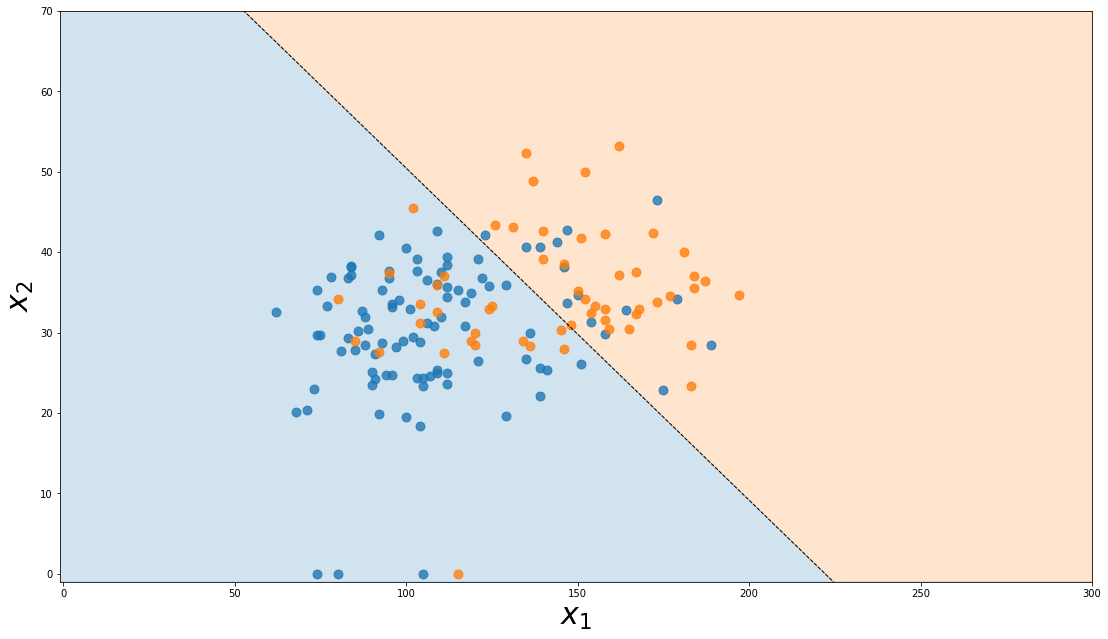

In [37]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 300
ymin, ymax = -1, 70
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X_test[y_test==0].T, s=80, alpha=0.8)
plt.scatter(*X_test[y_test==1].T, s=80, alpha=0.8)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$', size = 30)
plt.xlabel(r'$x_1$', size = 30)

plt.show()